In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.setrecursionlimit(10**9)

In [2]:
data = pd.read_csv('c75_research_data_202212.csv', low_memory = False)

## 데이터 전처리

In [3]:
# Pick female patients. 
# There are only 2 male patients out of 21246 patients.

data = data.loc[data['sex'] == 'F']

In [4]:
# drop columns as followings
# hispanic_yn: ratio of Y is too small = 640/21246 = 3% 그리고 차라리 race로 하는게 나을듯.

columns_drop = ['report_start_dt', 'report_end_dt', 'clinic_id', 'clinic_name','clinic_2_id', 'last_brc_screen_dt', 
                'last_bcs_month_cnt', 'denominator_yn', 'pseudo_pat_id', 'race_txt', 'hispanic_yn', 'sex', 
                'smoking_yn', 'drinking_yn', 'drinking_txt', 'last_mh_service_dt', 'prior_pregnancy_yn', 'PT_STATE', 'PT_ZIP',
                'ruca_ct_2_cd', 'ruca_zcta_1_cd', 'ruca_zcta_2_cd', 'RUCC_2013', 'state_adi_rank_num',
                'brc_c500_onset_dt', 'brc_c501_onset_dt', 'brc_c502_onset_dt', 'brc_c503_onset_dt', 'brc_c504_onset_dt', 
                'brc_c505_onset_dt', 'brc_c506_onset_dt', 'brc_c507_onset_dt', 'brc_c508_onset_dt', 'brc_c509_onset_dt', 
                'dx_c507_yn', 'RR_Star1', 'AbsRisk_Avg', 'overall_scale_num']

data = data.drop(columns = columns_drop, axis = 1)

In [5]:
# Replace categorical data (y/n) into binary data, replace NaN data into 0

data = data.replace({'numerator_yn' : {'Y' : 1}})
data = data.replace({'numerator_yn' : {'N' : 0}})

data = data.replace({'nulliparity_yn' : {np.nan : 1}})
data = data.replace({'nulliparity_yn' : {'N' : 0}})

data = data.replace({'uac_yn' : {'Y' : 1}})
data = data.replace({'uac_yn' : {'N' : 0}})

data = data.replace({'pa_urban_county_yn' : {'Y' : 1}})
data = data.replace({'pa_urban_county_yn' : {'N' : 0}})

In [6]:
# There is no data in 'dx_c507_yn' so I dropped early.
# Replace dx_c500_yn ~ dx_c509_yn into binary data.

dx_list = ['dx_c500_yn', 'dx_c501_yn', 'dx_c502_yn', 'dx_c503_yn', 'dx_c504_yn', 
           'dx_c505_yn', 'dx_c506_yn', 'dx_c508_yn', 'dx_c509_yn']

for i in range(len(dx_list)):
    data = data.replace({dx_list[i] : {'Y' : 1}})
    data = data.replace({dx_list[i] : {np.nan : 0}})

In [7]:
# Columns in dx_list has too small ratio of Y. They are all less than 5%.
# There is no data in 'dx_c507_yn' so I dropped (in the previous cell)

#dx_list = ['dx_c500_yn', 'dx_c501_yn', 'dx_c502_yn', 'dx_c503_yn', 'dx_c504_yn', 
#           'dx_c505_yn', 'dx_c506_yn', 'dx_c508_yn', 'dx_c509_yn']

#data = data.drop(columns = dx_list, axis = 1)

In [8]:
# Some of disease_list has too small ratio of Y. If there are less than 15% of data ratio, I'll erase them.
# obesity_yn는 last_bmi_num과 상관관계가 너무 높다. 그러니 drop. 의미적으로 볼 때 obesity_yn을 drop하는게 맞아보인다.

drop_disease_list = ['alcohol_drug_disorder_yn', 'autism_yn', 'bipolar_disorder_yn', 'cancer_yn', 'chf_cad_yn', 
                     'ckd_yn', 'opioid_yn', 'dementia_cognitive_disorder_yn', 'homeless_yn', 
                     'intrptr_needed_yn', 'medicare_age_less_65_yn', 'no_show_yn', 'obesity_yn', 'schizophrenia_yn', 
                     'sleeping_disorder_yn', 'transplant_yn', 'uninsured_yn', 'unspecific_psych_yn', 
                     'developmental_delay_yn', 'eating_disorder_yn', 'learning_disability_yn', 'gender_identity_disorder_yn']

data = data.drop(columns = drop_disease_list, axis = 1)

In [9]:
disease_list = ['asthma_copd_cf_yn', 'chronic_pain_yn', 'depression_anxiety_yn', 'diabetes_yn', 'med_order_gt_10_yn', 'htn_yn']

for i in range(len(disease_list)):
    data = data.replace({disease_list[i] : {'Y' : 1}})
    data = data.replace({disease_list[i] : {np.nan : 0}})

In [10]:
#disease_list = ['alcohol_drug_disorder_yn', 'asthma_copd_cf_yn', 'autism_yn', 'bipolar_disorder_yn', 'cancer_yn', 'chf_cad_yn', 
#                'ckd_yn', 'chronic_pain_yn', 'opioid_yn', 'dementia_cognitive_disorder_yn', 'depression_anxiety_yn', 'diabetes_yn', 
#                'homeless_yn', 'intrptr_needed_yn', 'medicare_age_less_65_yn', 'no_show_yn', 'obesity_yn', 'schizophrenia_yn', 
#                'sleeping_disorder_yn', 'med_order_gt_10_yn', 'transplant_yn', 'uninsured_yn', 'unspecific_psych_yn', 
#                'developmental_delay_yn', 'eating_disorder_yn', 'learning_disability_yn', 'gender_identity_disorder_yn', 'htn_yn']

In [11]:
# 서로 상관계수가 0.9씩이나 됨. brc_site_01_cd 빼고 다 지우자

brc_site_list = ['brc_site_01_cd', 'brc_site_02_cd', 'brc_site_03_cd', 'brc_site_04_cd', 'brc_site_05_cd', 'brc_site_06_cd', 
                 'brc_site_07_cd', 'brc_site_08_cd', 'brc_site_09_cd', 'brc_site_10_cd', 'brc_site_11_cd', 'brc_site_12_cd', 
                 'brc_site_13_cd', 'brc_site_14_cd', 'brc_site_15_cd', 'brc_site_16_cd', 'brc_site_17_cd', 'brc_site_18_cd', 
                 'brc_site_19_cd', 'brc_site_20_cd', 'brc_site_21_cd', 'brc_site_22_cd', 'brc_site_23_cd']

data = data.drop(columns = brc_site_list, axis = 1)

In [12]:
#collinearity_variables_list = ['vehicle_1_pct', 'vehicle_2_pct', 'vehicle_3_plus_pct', 
#                               'edu_less_hs_pct', 'edu_hs_pct', 'edu_some_col_pct', 'edu_ba_pct']

collinearity_variables_list = ['vehicle_3_plus_pct', 'edu_ba_pct']

data = data.drop(columns = collinearity_variables_list, axis = 1)

In [13]:
# Imputation 인데, vehicle_1_pct에 없는 데이터가 다른 vehicle 데이터 모두에게 없어서, 그냥 missing데이터 자체를 drop 하기로 했다.

#data.fillna({'vehicle_1_pct': data['vehicle_1_pct'].mean()}, inplace=True)
#data.fillna({'vehicle_2_pct': data['vehicle_2_pct'].mean()}, inplace=True)
#data.fillna({'vehicle_3_plus_pct': data['vehicle_3_plus_pct'].mean}, inplace=True)

In [14]:
#data.fillna({'edu_less_hs_pct': data['edu_less_hs_pct'].mean()}, inplace=True)
#data.fillna({'edu_hs_pct': data['edu_hs_pct'].mean()}, inplace=True)
#data.fillna({'edu_some_col_pct': data['edu_some_col_pct'].mean()}, inplace=True)
#data.fillna({'edu_ba_pct': data['edu_ba_pct'].mean()}, inplace=True)

In [15]:
# vehicle_0_pct = nan 인 행에 같이 결측값이 있는 애들이 굉장히 많았음.

data = data.dropna(subset = ['vehicle_0_pct'])

In [16]:
data = data.dropna(subset = ['smoking_txt'])

In [17]:
# 원래는 RR_Start2 를 mode()로 imputate하려고 했는데, 13개만 missing이라 그냥 지움

#data.fillna({'RR_Star2': data['RR_Star2'].mode()[0]}, inplace=True) # 21233 / 21246

data = data.dropna(subset = ['RR_Star2'])

In [18]:
data.fillna({'last_bmi_num': data['last_bmi_num'].mode()[0]}, inplace=True)

In [19]:
# ruce_ct_1_cd는 non_nan이 15627 / 21246 이라 drop하긴 좀 그렇고, 1~10 까지의 natural number이라 mode()로 넣어줬다.

data.fillna({'ruca_ct_1_cd': data['ruca_ct_1_cd'].mode()[0]}, inplace=True)

In [20]:
# challenging_wt_num은 non_nan이 19419 / 21246 이라 drop하기 조금 애매하고, 다른 것들 drop 했을 때 여전히 missing data가 있었다.
# continuous variable이라 mode말고 mean으로 inpute해줬다.

data.fillna({'challenging_wt_num': data['challenging_wt_num'].mean()}, inplace=True)

# 정규화 해주자
#data['challenging_wt_num'] = (data['challenging_wt_num'] - min(data['challenging_wt_num'])) / (max(data['challenging_wt_num']) - min(data['challenging_wt_num']))

#data = data.drop(columns = 'challenging_wt_num', axis = 1)

In [21]:
# 이걸 해주지 않으면, One-hot encoding시 문제가 생긴다. 반드시 해줘야 한다!!!

data = data.reset_index(drop=True)

## 여기까지 불필요한 Columns 제거와 NaN은 모두 처리했다.
## 이제부터 Categorical variables에 대해 One-hot encoding 수행

In [22]:
# One-hot encoding for 'race_2_txt', 'payer_category_txt', 'smoking_txt'

# ------------------------------------------------------------------------------------------------------------------------------
# data = pd.get_dummies(data)
# 이렇게 원핫인코딩을 하면 7개의 category에 대해 7개의 columns를 생성한다. 이렇게 하면 다중공선성이 발생할 수 밖에 없다. 
# 7개의 categories에 대해서는 그보다 한 개 적은 6개를 생성해야 한다. 
# 만약 7개면 마지막 1개의 column은 나머지 6개의 columns의 선형결합으로 생성이 가능하기 때문이다. (Chen의 조언)
# ------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------
# 원핫인코딩을 하니까 Multicollinearity가 발생해. 너무심각함. 그냥 숫자로 바꿔주자. 
# -> 그려려고 했으나, Chen의 조언을 듣고 다시 원핫인코딩 하기로 했음.
# ------------------------------------------------------------------------------------------------------------------------------

In [23]:
data = pd.get_dummies(data)

In [24]:
#onehot_list = ['race_2_txt_1: White', 'payer_category_txt_Commercial', 'smoking_txt_Never']

#data = data.drop(columns = onehot_list, axis = 1)

## Correlation Coefficient Matrix 및 VIF 확인

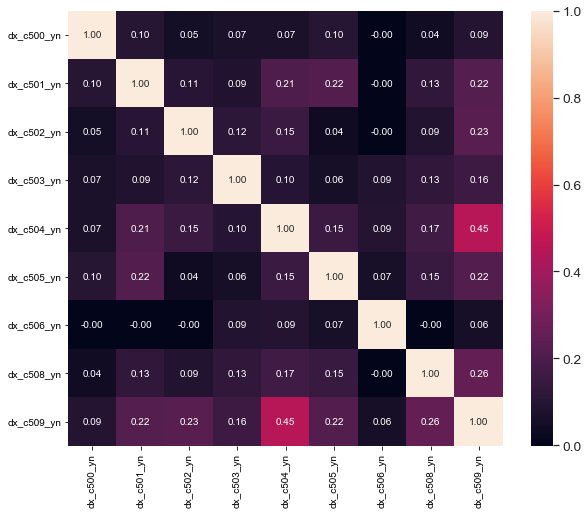

In [25]:
dx_list = ['dx_c500_yn', 'dx_c501_yn', 'dx_c502_yn', 'dx_c503_yn', 'dx_c504_yn', 
           'dx_c505_yn', 'dx_c506_yn', 'dx_c508_yn', 'dx_c509_yn']

for i in range(len(dx_list)):
    data = data.replace({dx_list[i] : {'Y' : 1}})
    data = data.replace({dx_list[i] : {np.nan : 0}})
    
dx_data = data[['dx_c500_yn', 'dx_c501_yn', 'dx_c502_yn', 'dx_c503_yn', 'dx_c504_yn', 
                'dx_c505_yn', 'dx_c506_yn', 'dx_c508_yn', 'dx_c509_yn']] 
    
cols = dx_data.columns
cm = np.corrcoef(dx_data.values.T)
f, ax = plt.subplots(figsize=(10, 8)) # figure size 조절
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [26]:
# There is no data in 'dx_c507_yn' so I dropped

#brc_site_list = ['brc_site_01_cd', 'brc_site_02_cd', 'brc_site_03_cd', 'brc_site_04_cd', 'brc_site_05_cd', 'brc_site_06_cd', 
#                 'brc_site_07_cd', 'brc_site_08_cd', 'brc_site_09_cd', 'brc_site_10_cd', 'brc_site_11_cd', 'brc_site_12_cd', 
#                 'brc_site_13_cd', 'brc_site_14_cd', 'brc_site_15_cd', 'brc_site_16_cd', 'brc_site_17_cd', 'brc_site_18_cd', 
#                 'brc_site_19_cd', 'brc_site_20_cd', 'brc_site_21_cd', 'brc_site_22_cd', 'brc_site_23_cd']
    
#brc_site_data = data[['brc_site_01_cd', 'brc_site_02_cd', 'brc_site_03_cd', 'brc_site_04_cd', 'brc_site_05_cd', 'brc_site_06_cd', 
#                 'brc_site_07_cd', 'brc_site_08_cd', 'brc_site_09_cd', 'brc_site_10_cd', 'brc_site_11_cd', 'brc_site_12_cd', 
#                 'brc_site_13_cd', 'brc_site_14_cd', 'brc_site_15_cd', 'brc_site_16_cd', 'brc_site_17_cd', 'brc_site_18_cd', 
#                 'brc_site_19_cd', 'brc_site_20_cd', 'brc_site_21_cd', 'brc_site_22_cd', 'brc_site_23_cd']]
    
#brc_site_data = brc_site_data.dropna()

#cols = brc_site_data.columns
#cm = np.corrcoef(brc_site_data.values.T)
#f, ax = plt.subplots(figsize=(20, 15)) # figure size 조절
#sns.set(font_scale=1.5)
#hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, yticklabels=cols.values, xticklabels=cols.values)
#plt.show()

In [27]:
#col_list = ['ruca_ct_1_cd', 'ruca_ct_2_cd', 'ruca_zcta_1_cd', 'ruca_zcta_2_cd', 'RUCC_2013']
    
#col_data = data[['ruca_ct_1_cd', 'ruca_ct_2_cd', 'ruca_zcta_1_cd', 'ruca_zcta_2_cd', 'RUCC_2013']]
    
#col_data = col_data.dropna()

#cols = col_data.columns
#cm = np.corrcoef(col_data.values.T)
#f, ax = plt.subplots(figsize=(5, 5)) # figure size 조절
#sns.set(font_scale=1.5)
#hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, yticklabels=cols.values, xticklabels=cols.values)
#plt.show()

In [28]:
#vehicle_list = ['vehicle_0_pct', 'vehicle_1_pct', 'vehicle_2_pct', 'vehicle_3_plus_pct', 
#            'edu_less_hs_pct', 'edu_hs_pct', 'edu_some_col_pct', 'edu_ba_pct']
    
#vehicle_data = data[['vehicle_0_pct', 'vehicle_1_pct', 'vehicle_2_pct', 'vehicle_3_plus_pct', 
#            'edu_less_hs_pct', 'edu_hs_pct', 'edu_some_col_pct', 'edu_ba_pct']]
    
#vehicle_data = vehicle_data.dropna()

#cols = vehicle_data.columns
#cm = np.corrcoef(vehicle_data.values.T)
#f, ax = plt.subplots(figsize=(5, 5)) # figure size 조절
#sns.set(font_scale=1.5)
#hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, yticklabels=cols.values, xticklabels=cols.values)
#plt.show()

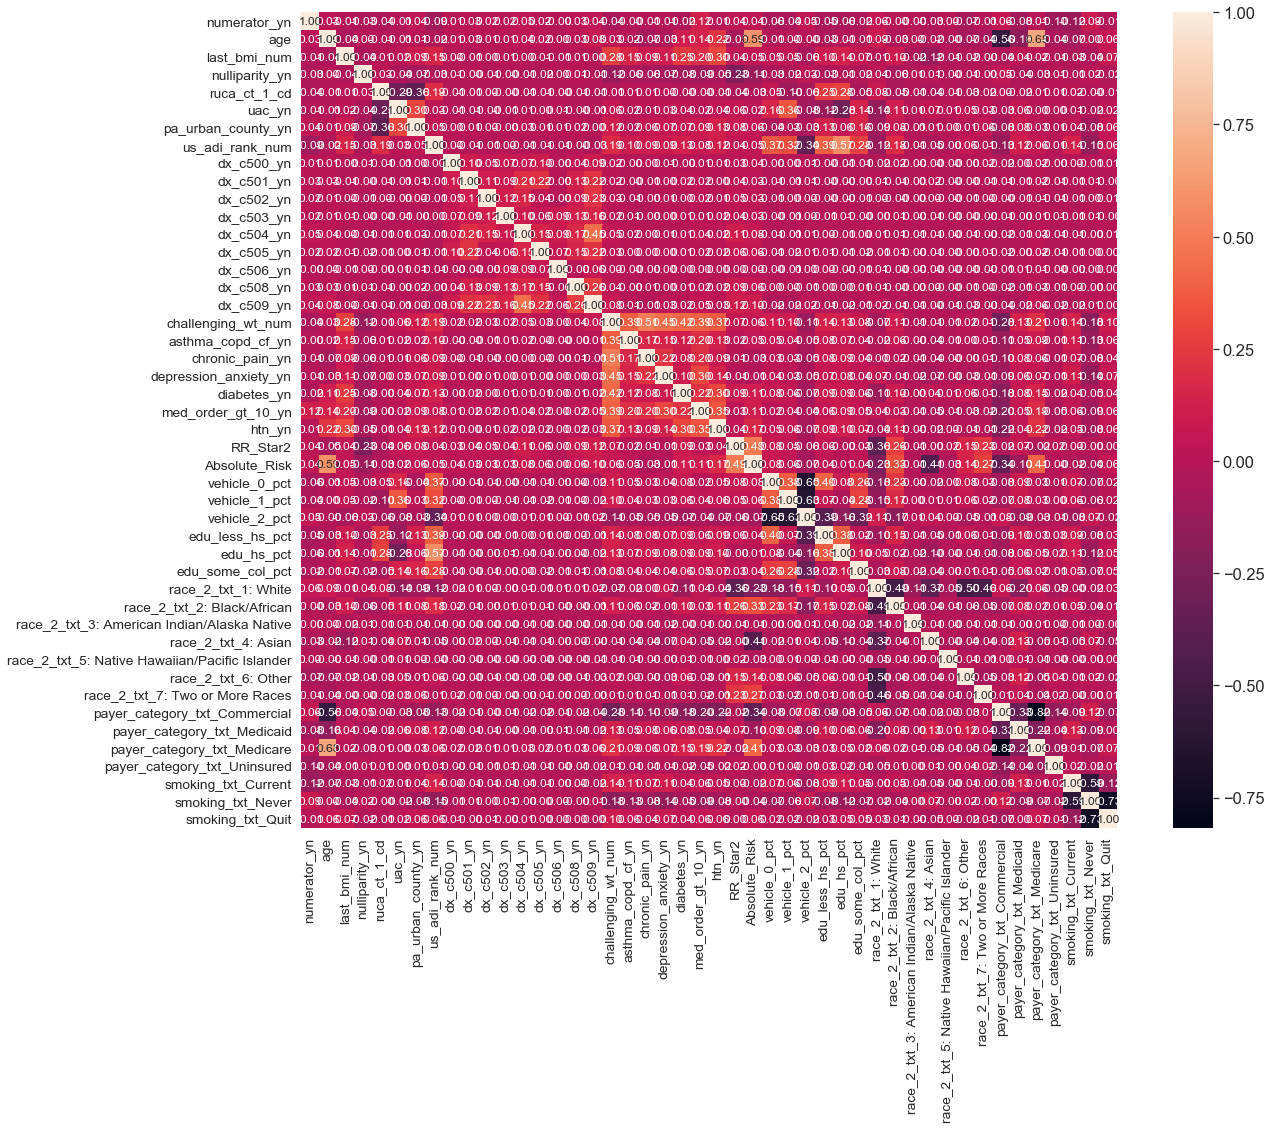

In [29]:
# Check Correlation Coefficient of each variables

cols = data.columns
cm = np.corrcoef(data.values.T)
f, ax = plt.subplots(figsize=(20, 15)) # figure size 조절
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif['features'] = data.columns
vif = vif.sort_values('VIF Factor').reset_index(drop = True)
vif

C:\Users\LG\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,1.022360,dx_c506_yn
1,1.028249,dx_c500_yn
2,1.056019,dx_c503_yn
3,1.071865,dx_c502_yn
4,1.073743,numerator_yn
5,1.082970,nulliparity_yn
6,1.103910,dx_c508_yn
7,1.104767,dx_c505_yn
8,1.115798,dx_c501_yn
9,1.204749,asthma_copd_cf_yn


## Data distribution 확인

In [31]:
# data.to_csv('data_cleaned.csv', index = False)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20249 entries, 0 to 20248
Data columns (total 46 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   numerator_yn                                    20249 non-null  int64  
 1   age                                             20249 non-null  int64  
 2   last_bmi_num                                    20249 non-null  float64
 3   nulliparity_yn                                  20249 non-null  int64  
 4   ruca_ct_1_cd                                    20249 non-null  float64
 5   uac_yn                                          20249 non-null  int64  
 6   pa_urban_county_yn                              20249 non-null  int64  
 7   us_adi_rank_num                                 20249 non-null  float64
 8   dx_c500_yn                                      20249 non-null  float64
 9   dx_c501_yn                             

In [33]:
# Y/N

print(data[['numerator_yn', 'nulliparity_yn']].groupby(['nulliparity_yn']).count())
print(data[['numerator_yn', 'nulliparity_yn']].groupby(['nulliparity_yn']).sum())

print(data[['numerator_yn', 'ruca_ct_1_cd']].groupby(['ruca_ct_1_cd']).count())
print(data[['numerator_yn', 'ruca_ct_1_cd']].groupby(['ruca_ct_1_cd']).sum())

print(data[['numerator_yn', 'uac_yn']].groupby(['uac_yn']).count())
print(data[['numerator_yn', 'uac_yn']].groupby(['uac_yn']).sum())

print(data[['numerator_yn', 'pa_urban_county_yn']].groupby(['pa_urban_county_yn']).count())
print(data[['numerator_yn', 'pa_urban_county_yn']].groupby(['pa_urban_county_yn']).sum())

print(data[['numerator_yn', 'dx_c500_yn']].groupby(['dx_c500_yn']).count())
print(data[['numerator_yn', 'dx_c500_yn']].groupby(['dx_c500_yn']).sum())

print(data[['numerator_yn', 'dx_c501_yn']].groupby(['dx_c501_yn']).count())
print(data[['numerator_yn', 'dx_c501_yn']].groupby(['dx_c501_yn']).sum())

print(data[['numerator_yn', 'dx_c502_yn']].groupby(['dx_c502_yn']).count())
print(data[['numerator_yn', 'dx_c502_yn']].groupby(['dx_c502_yn']).sum())

print(data[['numerator_yn', 'dx_c503_yn']].groupby(['dx_c503_yn']).count())
print(data[['numerator_yn', 'dx_c503_yn']].groupby(['dx_c503_yn']).sum())

print(data[['numerator_yn', 'dx_c504_yn']].groupby(['dx_c504_yn']).count())
print(data[['numerator_yn', 'dx_c504_yn']].groupby(['dx_c504_yn']).sum())

print(data[['numerator_yn', 'dx_c505_yn']].groupby(['dx_c505_yn']).count())
print(data[['numerator_yn', 'dx_c505_yn']].groupby(['dx_c505_yn']).sum())

print(data[['numerator_yn', 'dx_c506_yn']].groupby(['dx_c506_yn']).count())
print(data[['numerator_yn', 'dx_c506_yn']].groupby(['dx_c506_yn']).sum())

print(data[['numerator_yn', 'dx_c508_yn']].groupby(['dx_c508_yn']).count())
print(data[['numerator_yn', 'dx_c508_yn']].groupby(['dx_c508_yn']).sum())

print(data[['numerator_yn', 'dx_c509_yn']].groupby(['dx_c509_yn']).count())
print(data[['numerator_yn', 'dx_c509_yn']].groupby(['dx_c509_yn']).sum())

print(data[['numerator_yn', 'asthma_copd_cf_yn']].groupby(['asthma_copd_cf_yn']).count())
print(data[['numerator_yn', 'asthma_copd_cf_yn']].groupby(['asthma_copd_cf_yn']).sum())

print(data[['numerator_yn', 'chronic_pain_yn']].groupby(['chronic_pain_yn']).count())
print(data[['numerator_yn', 'chronic_pain_yn']].groupby(['chronic_pain_yn']).sum())

print(data[['numerator_yn', 'depression_anxiety_yn']].groupby(['depression_anxiety_yn']).count())
print(data[['numerator_yn', 'depression_anxiety_yn']].groupby(['depression_anxiety_yn']).sum())

print(data[['numerator_yn', 'diabetes_yn']].groupby(['diabetes_yn']).count())
print(data[['numerator_yn', 'diabetes_yn']].groupby(['diabetes_yn']).sum())

print(data[['numerator_yn', 'med_order_gt_10_yn']].groupby(['med_order_gt_10_yn']).count())
print(data[['numerator_yn', 'med_order_gt_10_yn']].groupby(['med_order_gt_10_yn']).sum())

print(data[['numerator_yn', 'htn_yn']].groupby(['htn_yn']).count())
print(data[['numerator_yn', 'htn_yn']].groupby(['htn_yn']).sum())

print(data[['numerator_yn', 'race_2_txt_1: White']].groupby(['race_2_txt_1: White']).count())
print(data[['numerator_yn', 'race_2_txt_1: White']].groupby(['race_2_txt_1: White']).sum())

print(data[['numerator_yn', 'race_2_txt_2: Black/African']].groupby(['race_2_txt_2: Black/African']).count())
print(data[['numerator_yn', 'race_2_txt_2: Black/African']].groupby(['race_2_txt_2: Black/African']).sum())

print(data[['numerator_yn', 'race_2_txt_3: American Indian/Alaska Native']].groupby(['race_2_txt_3: American Indian/Alaska Native']).count())
print(data[['numerator_yn', 'race_2_txt_3: American Indian/Alaska Native']].groupby(['race_2_txt_3: American Indian/Alaska Native']).sum())

print(data[['numerator_yn', 'race_2_txt_4: Asian']].groupby(['race_2_txt_4: Asian']).count())
print(data[['numerator_yn', 'race_2_txt_4: Asian']].groupby(['race_2_txt_4: Asian']).sum())

print(data[['numerator_yn', 'race_2_txt_5: Native Hawaiian/Pacific Islander']].groupby(['race_2_txt_5: Native Hawaiian/Pacific Islander']).count())
print(data[['numerator_yn', 'race_2_txt_5: Native Hawaiian/Pacific Islander']].groupby(['race_2_txt_5: Native Hawaiian/Pacific Islander']).sum())

print(data[['numerator_yn', 'race_2_txt_6: Other']].groupby(['race_2_txt_6: Other']).count())
print(data[['numerator_yn', 'race_2_txt_6: Other']].groupby(['race_2_txt_6: Other']).sum())

print(data[['numerator_yn', 'race_2_txt_7: Two or More Races']].groupby(['race_2_txt_7: Two or More Races']).count())
print(data[['numerator_yn', 'race_2_txt_7: Two or More Races']].groupby(['race_2_txt_7: Two or More Races']).sum())

print(data[['numerator_yn', 'payer_category_txt_Commercial']].groupby(['payer_category_txt_Commercial']).count())
print(data[['numerator_yn', 'payer_category_txt_Commercial']].groupby(['payer_category_txt_Commercial']).sum())

print(data[['numerator_yn', 'payer_category_txt_Medicaid']].groupby(['payer_category_txt_Medicaid']).count())
print(data[['numerator_yn', 'payer_category_txt_Medicaid']].groupby(['payer_category_txt_Medicaid']).sum())

print(data[['numerator_yn', 'payer_category_txt_Medicare']].groupby(['payer_category_txt_Medicare']).count())
print(data[['numerator_yn', 'payer_category_txt_Medicare']].groupby(['payer_category_txt_Medicare']).sum())

print(data[['numerator_yn', 'payer_category_txt_Uninsured']].groupby(['payer_category_txt_Uninsured']).count())
print(data[['numerator_yn', 'payer_category_txt_Uninsured']].groupby(['payer_category_txt_Uninsured']).sum())

print(data[['numerator_yn', 'smoking_txt_Current']].groupby(['smoking_txt_Current']).count())
print(data[['numerator_yn', 'smoking_txt_Current']].groupby(['smoking_txt_Current']).sum())

print(data[['numerator_yn', 'smoking_txt_Never']].groupby(['smoking_txt_Never']).count())
print(data[['numerator_yn', 'smoking_txt_Never']].groupby(['smoking_txt_Never']).sum())

print(data[['numerator_yn', 'smoking_txt_Quit']].groupby(['smoking_txt_Quit']).count())
print(data[['numerator_yn', 'smoking_txt_Quit']].groupby(['smoking_txt_Quit']).sum())

                numerator_yn
nulliparity_yn              
0                       1318
1                      18931
                numerator_yn
nulliparity_yn              
0                        963
1                      12758
              numerator_yn
ruca_ct_1_cd              
1.0                  17763
2.0                   1931
3.0                     51
4.0                    249
5.0                     69
6.0                     58
7.0                     66
8.0                      3
10.0                    59
              numerator_yn
ruca_ct_1_cd              
1.0                  12139
2.0                   1267
3.0                     25
4.0                    144
5.0                     43
6.0                     35
7.0                     31
8.0                      2
10.0                    35
        numerator_yn
uac_yn              
0               4636
1              15613
        numerator_yn
uac_yn              
0               3166
1              10555
      

                  numerator_yn
smoking_txt_Quit              
0                        11961
1                         1760


In [34]:
stat = data[['numerator_yn', 'age', 'last_bmi_num', 'us_adi_rank_num', 'challenging_wt_num', 'RR_Star2', 'Absolute_Risk',
            'vehicle_0_pct', 'vehicle_1_pct', 'vehicle_2_pct', 'edu_less_hs_pct', 'edu_hs_pct', 'edu_some_col_pct']]

stat.describe()

,numerator_yn,age,last_bmi_num,us_adi_rank_num,challenging_wt_num,RR_Star2,Absolute_Risk,vehicle_0_pct,vehicle_1_pct,vehicle_2_pct,edu_less_hs_pct,edu_hs_pct,edu_some_col_pct
count,20249.000000,20249.000000,20249.000000,20249.000000,20249.000000,20249.000000,20249.000000,20249.000000,20249.000000,20249.000000,20249.000000,20249.000000,20249.000000
mean,0.677614,61.436565,30.231758,49.293694,231.032437,1.146255,1.101251,5.522851,31.326031,40.487940,7.256497,32.018263,25.238323
std,0.467401,6.987956,7.652679,17.084609,130.669155,0.144822,0.284224,6.192655,11.143687,8.862588,5.058773,11.535155,6.244182
min,0.000000,50.000000,12.850000,5.000000,36.800000,1.000000,0.283775,0.000000,4.700000,5.100000,0.000000,0.400000,5.400000
25%,0.000000,56.000000,25.030000,37.000000,131.000000,1.098571,0.887070,1.800000,22.900000,34.700000,3.500000,22.800000,21.600000
50%,1.000000,61.000000,28.680000,49.000000,217.800000,1.098571,1.133294,3.500000,30.700000,41.400000,6.100000,33.300000,25.100000
75%,1.000000,67.000000,34.430000,60.000000,289.700000,1.098571,1.244160,6.800000,38.400000,46.400000,9.700000,40.900000,28.900000
max,1.000000,74.000000,78.190000,100.000000,1034.600000,4.292103,2.857595,62.500000,66.800000,83.300000,38.400000,62.600000,98.100000


In [35]:
bins_1 = list(range(0, 11, 1))
bins_2 = list(range(0, 111, 10))
bins_3 = list(range(0, 1101, 100))
bins_1_label = ['['+str(x)+','+str(x+1)+')' for x in bins_1]
bins_2_label = ['['+str(x)+','+str(x+10)+')' for x in bins_2]
bins_3_label = ['['+str(x)+','+str(x+100)+')' for x in bins_3]

# https://hleecaster.com/pandas-pd-cut/?ckattempt=1
# https://pybasall.tistory.com/m/331
stat['age_group'] = pd.cut(data['age'], bins_2, right=False, labels = bins_2_label[:-1])
stat['last_bmi_num_group'] = pd.cut(data['last_bmi_num'], bins_2, right=False, labels = bins_2_label[:-1])
stat['us_adi_rank_num_group'] = pd.cut(data['us_adi_rank_num'], bins_2, right=False, labels = bins_2_label[:-1])
stat['challenging_wt_num_group'] = pd.cut(data['challenging_wt_num'], bins_3, right=False, labels = bins_3_label[:-1])
stat['RR_Star2_group'] = pd.cut(data['RR_Star2'], bins_1, right=False, labels = bins_1_label[:-1])
stat['Absolute_Risk_group'] = pd.cut(data['Absolute_Risk'], bins_1, right=False, labels = bins_1_label[:-1])
stat['vehicle_0_pct_group'] = pd.cut(data['vehicle_0_pct'], bins_2, right=False, labels = bins_2_label[:-1])
stat['vehicle_1_pct_group'] = pd.cut(data['vehicle_1_pct'], bins_2, right=False, labels = bins_2_label[:-1])
stat['vehicle_2_pct_group'] = pd.cut(data['vehicle_2_pct'], bins_2, right=False, labels = bins_2_label[:-1])
stat['edu_less_hs_pct_group'] = pd.cut(data['edu_less_hs_pct'], bins_2, right=False, labels = bins_2_label[:-1])
stat['edu_hs_pct_group'] = pd.cut(data['edu_hs_pct'], bins_2, right=False, labels = bins_2_label[:-1])
stat['edu_some_col_pct'] = pd.cut(data['edu_some_col_pct'], bins_2, right=False, labels = bins_2_label[:-1])

print(stat[['numerator_yn', 'age_group']].groupby(['age_group']).count())
print(stat[['numerator_yn', 'age_group']].groupby(['age_group']).sum())

print(stat[['numerator_yn', 'last_bmi_num_group']].groupby(['last_bmi_num_group']).count())
print(stat[['numerator_yn', 'last_bmi_num_group']].groupby(['last_bmi_num_group']).sum())

print(stat[['numerator_yn', 'us_adi_rank_num_group']].groupby(['us_adi_rank_num_group']).count())
print(stat[['numerator_yn', 'us_adi_rank_num_group']].groupby(['us_adi_rank_num_group']).sum())

print(stat[['numerator_yn', 'challenging_wt_num_group']].groupby(['challenging_wt_num_group']).count())
print(stat[['numerator_yn', 'challenging_wt_num_group']].groupby(['challenging_wt_num_group']).sum())

print(stat[['numerator_yn', 'RR_Star2_group']].groupby(['RR_Star2_group']).count())
print(stat[['numerator_yn', 'RR_Star2_group']].groupby(['RR_Star2_group']).sum())

print(stat[['numerator_yn', 'Absolute_Risk_group']].groupby(['Absolute_Risk_group']).count())
print(stat[['numerator_yn', 'Absolute_Risk_group']].groupby(['Absolute_Risk_group']).sum())

print(stat[['numerator_yn', 'vehicle_0_pct_group']].groupby(['vehicle_0_pct_group']).count())
print(stat[['numerator_yn', 'vehicle_0_pct_group']].groupby(['vehicle_0_pct_group']).sum())

print(stat[['numerator_yn', 'vehicle_1_pct_group']].groupby(['vehicle_1_pct_group']).count())
print(stat[['numerator_yn', 'vehicle_1_pct_group']].groupby(['vehicle_1_pct_group']).sum())

print(stat[['numerator_yn', 'vehicle_2_pct_group']].groupby(['vehicle_2_pct_group']).count())
print(stat[['numerator_yn', 'vehicle_2_pct_group']].groupby(['vehicle_2_pct_group']).sum())

print(stat[['numerator_yn', 'edu_less_hs_pct_group']].groupby(['edu_less_hs_pct_group']).count())
print(stat[['numerator_yn', 'edu_less_hs_pct_group']].groupby(['edu_less_hs_pct_group']).sum())

print(stat[['numerator_yn', 'edu_hs_pct_group']].groupby(['edu_hs_pct_group']).count())
print(stat[['numerator_yn', 'edu_hs_pct_group']].groupby(['edu_hs_pct_group']).sum())

print(stat[['numerator_yn', 'edu_some_col_pct']].groupby(['edu_some_col_pct']).count())
print(stat[['numerator_yn', 'edu_some_col_pct']].groupby(['edu_some_col_pct']).sum())

           numerator_yn
age_group              
[0,10)                0
[10,20)               0
[20,30)               0
[30,40)               0
[40,50)               0
[50,60)            8635
[60,70)            8281
[70,80)            3333
[80,90)               0
[90,100)              0
[100,110)             0
           numerator_yn
age_group              
[0,10)                0
[10,20)               0
[20,30)               0
[30,40)               0
[40,50)               0
[50,60)            5719
[60,70)            5708
[70,80)            2294
[80,90)               0
[90,100)              0
[100,110)             0
                    numerator_yn
last_bmi_num_group              
[0,10)                         0
[10,20)                      751
[20,30)                    10659
[30,40)                     6608
[40,50)                     1814
[50,60)                      370
[60,70)                       38
[70,80)                        9
[80,90)                        0
[90,100)     

C:\Users\LG\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\LG\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\LG\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst